In [1]:
import os

%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt

In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
gnb.configuration()

Library,Version
OS,posix [linux]
Python,"3.7.1 (default, Oct 22 2018, 10:41:28) [GCC 8.2.1 20180831]"
IPython,7.1.1
MatPlotLib,3.0.1
Numpy,1.15.3
pyAgrum,0.13.2.9


## Static Credal Net

In [3]:
cn=gum.CredalNet(os.path.join("res","cn/2Umin.bif"),os.path.join("res","cn/2Umax.bif"))

In [4]:
cn.intervalToCredal()

In [5]:
gnb.showBN(cn.current_bn(),"3")

In [6]:
ie=gum.CNMonteCarloSampling(cn)
ie.insertEvidenceFile(os.path.join("res","cn/L2U.evi"))

In [7]:
ie.setRepetitiveInd(False)

ie.setRepetitiveInd(False)
ie.setMaxTime(1)
ie.setMaxIter(1000)

ie.makeInference()

In [8]:
print(ie.marginalMax(0))
print(ie.marginalMin(0))

(0.6944981713321142, 0.5612106387839855)
(0.43878936121601464, 0.3055018286678858)


## Dynamical Credal Net

In [9]:
cn=gum.CredalNet(os.path.join("res","cn/bn_c_8.bif"),os.path.join("res","cn/den_c_8.bif"))
cn.bnToCredal(0.8,False)

In [10]:
ie=gum.CNMonteCarloSampling(cn)
ie.insertModalsFile(os.path.join("res","cn/modalities.modal"))

ie.setRepetitiveInd(True)
ie.setMaxTime(30)
ie.setMaxIter(1000)

ie.makeInference()

In [11]:
print(ie.dynamicExpMax("temp"))

(14.20340463585978, 11.81769989517025, 12.100195091531482, 11.961533682194089, 11.965402113597833, 11.96497391812688, 11.965020030630079, 11.965015169270032, 11.96501567303239)


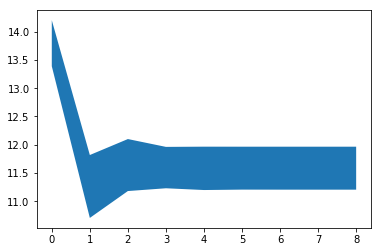

In [12]:
fig=figure()
ax=fig.add_subplot(111)
ax.fill_between(range(9),ie.dynamicExpMax("temp"),ie.dynamicExpMin("temp"))

In [13]:
ie=gum.CNMonteCarloSampling(cn)
ie.insertModalsFile(os.path.join("res","cn/modalities.modal"))

ie.setRepetitiveInd(False)
ie.setMaxTime(30)
ie.setMaxIter(1000)

ie.makeInference()


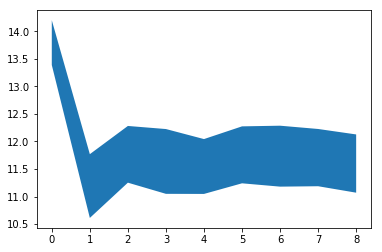

In [14]:
fig=figure()
ax=fig.add_subplot(111)
ax.fill_between(range(9),ie.dynamicExpMax("temp"),ie.dynamicExpMin("temp"))

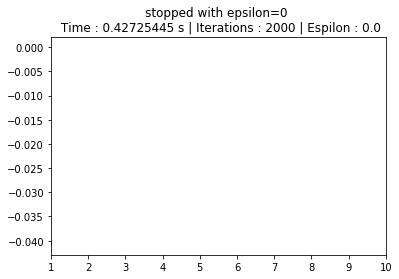

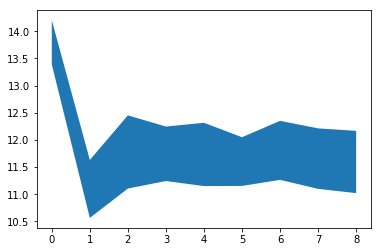

In [15]:
ie=gum.CNMonteCarloSampling(cn)
ie.insertModalsFile(os.path.join("res","cn/modalities.modal"))

ie.setRepetitiveInd(False)
ie.setMaxTime(30)
ie.setMaxIter(1000)

gnb.animApproximationScheme(ie)
ie.makeInference()

fig=figure()
ax=fig.add_subplot(111)
ax.fill_between(range(9),ie.dynamicExpMax("temp"),ie.dynamicExpMin("temp"))
